### <center>Google Playstore DataBase analysis</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Processing the DataBase

In [3]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In this case, it can be seen that the most missing values are present in the Rating section. This category is crucial for the classification of the apps, that is why it will be fixed

In [4]:
# Inspection of the different categories

df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [5]:
# 1.9 Category seems a little bit odd, that is why it will be deleted

filt = df["Category"] == "1.9"
df.drop(index=df[filt].index, inplace=True)


In [6]:
df.reset_index(inplace=True)
df.drop(columns="index", inplace=True)

df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
means_cat = df.groupby(by="Category")["Rating"].mean()

df["Rating"].fillna(0, inplace=True)

for i in range(df.shape[0]):
    rate_val = df.loc[i, "Rating"]
    cat_val = df.loc[i, "Category"]

    if rate_val == 0:
        df.loc[i, "Rating"] = means_cat[cat_val]


df.dropna(axis='index', how='any', inplace=True)


In [8]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
df.reset_index(inplace=True)
df.drop(columns="index", inplace=True)

Once all the categories don´t have missing values, it is possible to explore them in more detail 

In [10]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
df["Price"] = df["Price"].str.strip("$")
df["Price"] = df["Price"].apply(lambda x: float(x))


In [12]:
df.drop(columns="Type", inplace=True)

In [13]:
df["Reviews"] = df["Reviews"].apply(lambda x: float(x))


In [14]:
last_name = df.loc[0, "App"].lower()
for i in range(1, df.shape[0]):
    name = df.loc[i, "App"]
    name = name.lower()

    if name == last_name:
        print(i)
    
    last_name = name

5348
5362


In [15]:
df.loc[[5348,5362]]  # The second one is the more recent app, this one will be kept

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5348,I AM RICH,FAMILY,3.9,1455.0,1.1M,"10,000+",0.00,Everyone,Entertainment,"October 11, 2017",1.0,2.3 and up
5362,I Am Rich,FAMILY,3.6,217.0,4.9M,"10,000+",389.99,Everyone,Entertainment,"June 22, 2018",1.5,4.2 and up


In [16]:
df.drop(index=5348, inplace=True)

df.reset_index(inplace=True)
df.drop(columns="index", inplace=True)
df.drop(columns="Genres", inplace=True)

In [17]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"])

#### Analysis and answering of different questions regaridng the DB

In [18]:
df

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159.0,19M,"10,000+",0.0,Everyone,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967.0,14M,"500,000+",0.0,Everyone,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510.0,8.7M,"5,000,000+",0.0,Everyone,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644.0,25M,"50,000,000+",0.0,Teen,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967.0,2.8M,"100,000+",0.0,Everyone,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...
10823,Sya9a Maroc - FR,FAMILY,4.500000,38.0,53M,"5,000+",0.0,Everyone,2017-07-25,1.48,4.1 and up
10824,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4.0,3.6M,100+,0.0,Everyone,2018-07-06,1.0,4.1 and up
10825,Parkinson Exercices FR,MEDICAL,4.189143,3.0,9.5M,"1,000+",0.0,Everyone,2017-01-20,1.0,2.2 and up
10826,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114.0,Varies with device,"1,000+",0.0,Mature 17+,2015-01-19,Varies with device,Varies with device


##### Month with the most updates

In [19]:
df["Last Updated"].dt.month_name().value_counts()

July         3161
August       1594
June         1271
May           977
March         666
April         614
February      532
January       490
December      426
October       397
November      386
September     314
Name: Last Updated, dtype: int64

##### Top 5 categories

In [20]:
df["Category"].value_counts().nlargest(5)

FAMILY      1967
GAME        1144
TOOLS        841
MEDICAL      463
BUSINESS     460
Name: Category, dtype: int64

##### Top 5 rated Apps

In this case reviews will be passed as a further parameter

In [21]:
df.sort_values(by=["Rating", "Reviews"], ascending=[False, False]).head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Last Updated,Current Ver,Android Ver
10345,Ríos de Fe,LIFESTYLE,5.0,141.0,15M,"1,000+",0.0,Everyone,2018-03-24,1.8,4.1 and up
10290,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5.0,104.0,2.3M,"1,000+",0.0,Everyone,2018-08-07,2.1.0,4.1 and up
8048,Oración CX,LIFESTYLE,5.0,103.0,3.8M,"5,000+",0.0,Everyone,2017-09-12,5.1.10,4.1 and up
6816,Barisal University App-BU Face,FAMILY,5.0,100.0,10M,"1,000+",0.0,Everyone,2018-05-06,3.1.1,4.0.3 and up
9485,Master E.K,FAMILY,5.0,90.0,Varies with device,"1,000+",0.0,Everyone,2017-08-11,1.5.0,4.4 and up


##### Correlations between rating and reviews

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

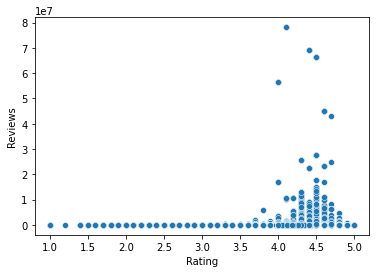

In [22]:
sns.scatterplot(data=df, x="Rating", y="Reviews")

No correlation can be bserved, it is better if the Reviews are scaled

In [23]:
df["Norm_rev"] = (df["Reviews"] - df["Reviews"].mean())/(df["Reviews"].std()*5)

<AxesSubplot:xlabel='Rating', ylabel='Norm_rev'>

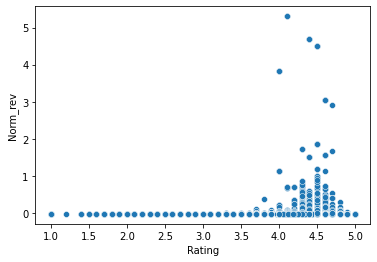

In [24]:
sns.scatterplot(data=df, x="Rating", y="Norm_rev")

##### Content rating distribution

<AxesSubplot:xlabel='Content Rating', ylabel='count'>

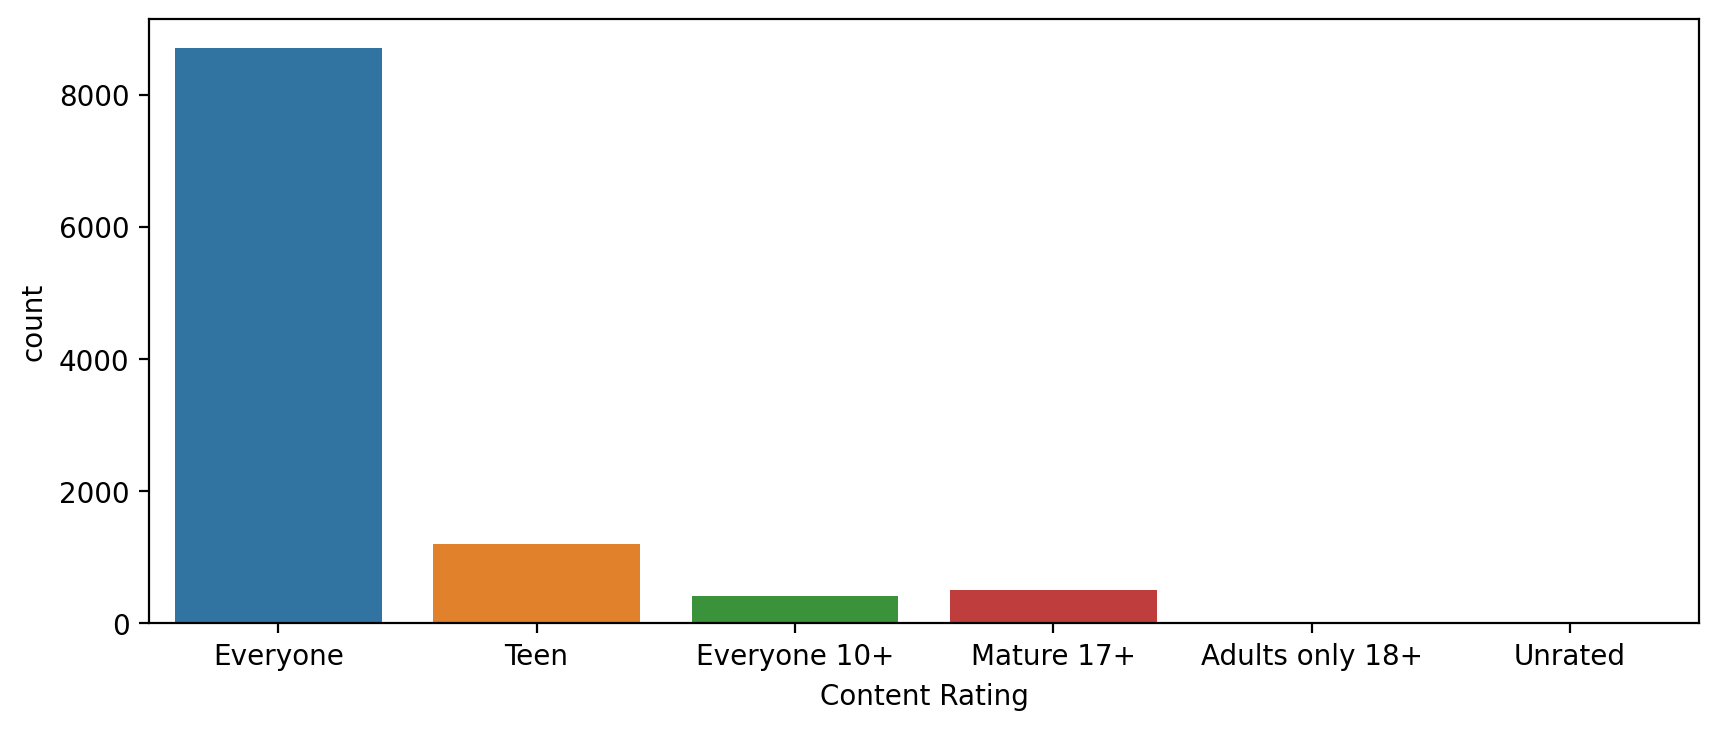

In [25]:
plt.figure(figsize=(10,4),dpi=200)

sns.countplot(x='Content Rating',data=df)